<a href="https://colab.research.google.com/github/sgangoly/Generative-AI-for-Security/blob/main/SalesForce_LLM_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LLM with Salesforce/xgen-7b-8k-base model, using PyTorch and Alpaca dataset from Hugging Face ##

Trl: used to train transformer language models with reinforcement learning.

<br> Peft uses the parameter-efficient fine-tuning (PEFT) methods to enable efficient adaptation of the pre-trained model.
<br>
Torch: a widely-used open-source machine learning library.
<br>
Datasets: used to assist in downloading and loading many common machine learning datasets.
<br>
The code is written in a Jupyter notebook cell with the "%%bash", which runs the cell as a bash shell script.
<br>
"pip -q install trl" ***installs the 'trl'*** Python package quietly, meaning it won't print any output.
<br>
"pip -q install peft" ***installs the 'peft'*** Python package quietly.
<br>
"pip -q install torch" ***installs the 'torch'*** Python package quietly, which is a popular library for deep learning.
<br>
"pip -q install datasets" ***installs the 'datasets'*** Python package quietly, used for loading and processing datasets.
<br>
"pip -q install transformers" ***installs the 'transformers'*** Python package quietly, used for state-of-the-art natural language processing.




In [ ]:
%%bash
pip -q install trl
pip -q install peft
pip -q install torch
pip -q install datasets
pip -q install transformers

bash: /home/sgangoly/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)


Import the ***torch*** library, a popular open-source machine learning library.
<br>
• from trl import ***SFTTrainer*** imports the SFTTrainer class from the trl (Transfer Reinforcement Learning) library.
<br>
• from datasets import ***load_dataset*** imports the load_dataset function from the datasets library.
<br>
• from peft import ***LoraConfig, get_peft_model, prepare_model_for_int8_training*** imports three items from the peft library.
<br>
• from transformers import ***AutoModelForCausalLM, AutoTokenizer, TrainingArguments*** imports three items from the transformers library, a popular library for Natural Language Processing (NLP).

In [ ]:
import torch
from trl import SFTTrainer
from datasets import load_dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_int8_training
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments

### Data Loading and Preparation

The  ***alpaca***  dataset, freely available on ***Hugging Face***, is used. The dataset has three main columns: ***instructions, input***, and ***output***. These columns are combined to generate a final text column.

The instruction to load the dataset is given below by providing the name of the dataset of interest, which is ***tatsu-lab/alpaca***

<br>

The code is written in Python and uses the load_dataset function from the Hugging Face's datasets library.
<br>
The load_dataset function is used to load a dataset for machine learning tasks.
<br>
"tatsu-lab/alpaca" is the identifier of the dataset to be loaded from the Hugging Face's dataset hub.
<br>
The split parameter is set to "train" to load only the training portion of the dataset.
<br>
The loaded dataset is stored in the train_dataset variable.
<br>
The print function is used to display the content of the train_dataset variable.

In [ ]:
train_dataset = load_dataset("tatsu-lab/alpaca", split="train")
print(train_dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 52002
})


The data above is in a dictionary of two keys:
<br>
- **Features** : containing the main columns of the data
<br>
- **Num_rows**: corresponding to the total number of rows in the data


The first five rows are displayed. First, we convert the dictionary into a pandas dataframe, then display the rows.
<br>
- The first line converts the ***'train_dataset'*** to a pandas DataFrame using the ***'to_pandas()'*** method.
- The second line uses the ***'display()'*** function to print the first 5 rows of the DataFrame.

In [ ]:
pandas_format = train_dataset.to_pandas()
display(pandas_format.head())

,instruction,input,output,text
0,Give three tips for staying healthy.,,1.Eat a balanced diet and make sure to include...,Below is an instruction that describes a task....
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",Below is an instruction that describes a task....
2,Describe the structure of an atom.,,"An atom is made up of a nucleus, which contain...",Below is an instruction that describes a task....
3,How can we reduce air pollution?,,There are a number of ways to reduce air pollu...,Below is an instruction that describes a task....
4,Describe a time when you had to make a difficu...,,I had to make a difficult decision when I was ...,Below is an instruction that describes a task....


For better visualization, we print the information about the first three rows. Prior to doing that, we install the ***textwrap*** library to set the maximum number of words per line to 50. The first print statement separates each block by 15 dashes.

- The code begins with a for loop that iterates over a range of 3, meaning it will run three times.
- For each iteration, it first prints a line of hyphens to separate the output of each loop.
- It then prints the word "Instruction:" followed by the value of the "instruction" column of the pandas DataFrame at the current index.
- The ***textwrap.fill*** function is used to wrap the text at a specified width, in this case, 50 characters.
- It then prints the word "Output:" followed by the value of the "output" column of the DataFrame at the current index.
- Again, ***textwrap.fill*** is used to wrap the text at a width of 50 characters.
- Finally, it prints the word "Text:" followed by the value of the "text" column of the DataFrame at the current index.
- The ***textwrap.fill*** function is used one last time to wrap the text at a width of 50 characters.

In [ ]:
!pip -q install textwrap3

/bin/bash: /home/sgangoly/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
import textwrap

In [ ]:
for index in range(3):
  print("---"*15)
  print("Instruction: {}".format(textwrap.fill(pandas_format.iloc[index]["instruction"], width=50)))
  print("Output: {}".format(textwrap.fill(pandas_format.iloc[index]["output"], width=50)))
  print("Text: {}".format(textwrap.fill(pandas_format.iloc[index]["text"], width=50)))

---------------------------------------------
Instruction: Give three tips for staying healthy.
Output: 1.Eat a balanced diet and make sure to include
plenty of fruits and vegetables.  2. Exercise
regularly to keep your body active and strong.  3.
Get enough sleep and maintain a consistent sleep
schedule.
Text: Below is an instruction that describes a task.
Write a response that appropriately completes the
request.  ### Instruction: Give three tips for
staying healthy.  ### Response: 1.Eat a balanced
diet and make sure to include plenty of fruits and
vegetables.  2. Exercise regularly to keep your
body active and strong.  3. Get enough sleep and
maintain a consistent sleep schedule.
---------------------------------------------
Instruction: What are the three primary colors?
Output: The three primary colors are red, blue, and
yellow.
Text: Below is an instruction that describes a task.
Write a response that appropriately completes the
request.  ### Instruction: What are the three
prima

## Model Training ##

Before proceeding to train the model, we need to set up some prerequisites:
<br>
- **Pre-trained Model***: We will use the pre-trained model ***Salesforce/xgen-7b-8k-base***, which is available on **Hugging Face**. Salesforce trained this series of 7B LLMs named XGen-7B with standard dense attention on up to 8K sequences for up to 1.5T tokens.
- **Tokenizer**: This is needed for tokenization tasks on the training data. The code to load the pre-trained model and tokenizer is as follows:

- The first line sets the variable ***pretrained_model_name*** to the string "Salesforce/xgen-7b-8k-base".
- The second line uses the ***from_pretrained method*** of ***AutoModelForCausalLM*** to load a pretrained model.
- The pretrained model is specified by the ***pretrained_model_name***, and the data type for the model's tensors is set to **torch.bfloat16**.
- The third line uses the ***from_pretrained*** method of **AutoTokenizer** to load a tokenizer that matches the pretrained model.
- The tokenizer is also specified by the ***pretrained_model_name***, and the ***trust_remote_code*** parameter is set to True.

In [ ]:
!pip install tiktoken

/bin/bash: /home/sgangoly/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [ ]:
pretrained_model_name = "Salesforce/xgen-7b-8k-base"
model = AutoModelForCausalLM.from_pretrained(pretrained_model_name, torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### Training configuration ###
The training requires some training arguments and configurations, and the two important configuration objects are defined below, an instance of the **TrainingArguments**, an instance of the **LoraConfig model**, and finally the **SFTTrainer** model.

**TrainingArguments** : This is used to define the parameters for model training.

In this specific scenario, we start by defining the destination where the trained model will be stored using the *output_dir* attribute before defining additional hyperparameters, such as the *optimization method*, the *learning rate*, the *number of epochs*, and more.
<br>

- This code is creating an instance of the TrainingArguments class with specific parameters.
- **output_dir="xgen-7b-8k-base-fine-tuned"** sets the directory where the model and its outputs will be saved.
- **per_device_train_batch_size=4** sets the number of training examples utilized in one iteration.
- **optim="adamw_torch"** sets the optimizer to be used during training to AdamW from the PyTorch library.
- **logging_steps=80** sets the frequency of logging steps, i.e., logs will be printed every 80 steps.
- **learning_rate=2e-4** sets the learning rate for the optimizer.
- **warmup_ratio=0.1** sets the ratio of total steps for which linear warmup will be performed.
- **lr_scheduler_type="linear"** sets the learning rate scheduler to linear.
- **num_train_epochs=1** sets the number of times the learning algorithm will work through the entire training dataset.
- **save_strategy="epoch"** sets the strategy to save checkpoints, in this case, at the end of each epoch.

In [ ]:
model_training_args = TrainingArguments(
       output_dir="xgen-7b-8k-base-fine-tuned",
       per_device_train_batch_size=4,
       optim="adamw_torch",
       logging_steps=80,
       learning_rate=2e-4,
       warmup_ratio=0.1,
       lr_scheduler_type="linear",
       num_train_epochs=1,
       save_strategy="epoch"
   )

### LoRAConfig ###
The main arguments used for this scenario are the rank of the low-rank transformation matrix in LoRA, which is set to 16. Then, the scaling factor for the additional parameters in LoRA is set to 32.
<br>
The dropout ratio is 0.05, meaning that 5% of the input units will be ignored during the training. Finally, since we are dealing with a causual language modeling, the task is hence initialized with the **CAUSAL_LM attribute**.

### SFTTrainer ###
This aims to train the model using the training data, the tokenizer, and additional information such as the above models.

Since we are using the text field from the training data, it is important to have a look at the distribution in order to help in setting the maximum number of tokens in a given sequence.
<br>

- The code starts by importing the matplotlib.pyplot library, which is used for data visualization.
- The second line adds a new column 'text_length' to the pandas dataframe 'pandas_format'.
- This column contains the length of each text in the 'text' column.
- 'plt.figure(figsize=(10,6))' sets the size of the figure to be created.
- 'plt.hist()' creates a histogram of the 'text_length' column with 50 bins, semi-transparent and green in color.
- 'plt.title()', 'plt.xlabel()', and 'plt.ylabel()' label the plot's title, x-axis, and y-axis respectively.
- 'plt.grid(True)' adds a grid to the plot for better readability.
- Finally, 'plt.show()' displays the plot.

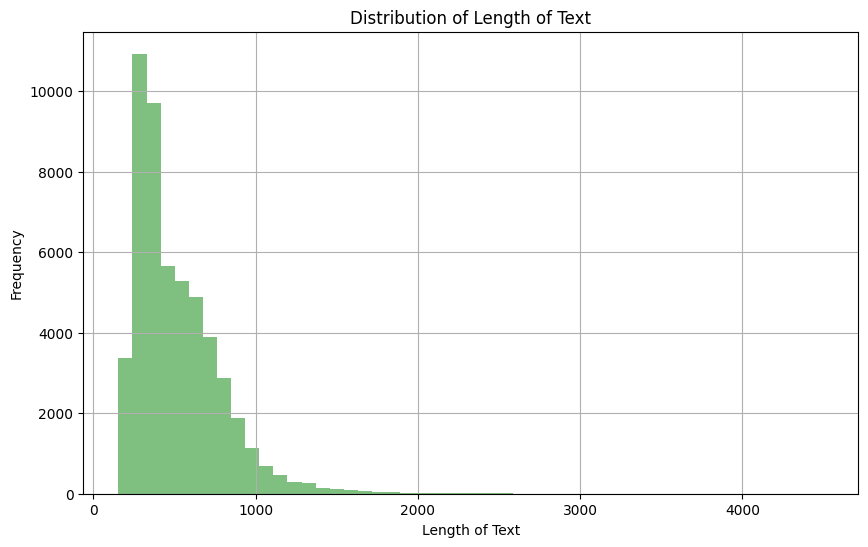

In [ ]:
import matplotlib.pyplot as plt


pandas_format['text_length'] = pandas_format['text'].apply(len)


plt.figure(figsize=(10,6))
plt.hist(pandas_format['text_length'], bins=50, alpha=0.5, color='g')
plt.title('Distribution of Length of Text')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Based on the above observation, we can see that the majority of text has a length between 0 and 1000. Also, we can see below that only 4.5% percent of the text documents have a length greater than 1024.

<br>

- The code uses the pandas library to analyze a DataFrame named 'pandas_format'.
- 'mask' is a boolean Series where each value is True if the corresponding 'text_length' is greater than 1024.
- 'mask.sum()' counts the number of True values (i.e., text lengths greater than 1024).
- 'pandas_format['text_length'].count()' gets the total number of 'text_length' entries in the DataFrame.
- 'percentage' calculates the percentage of 'text_length' values that are greater than 1024.
- The final line prints this percentage, formatted as a string.

In [ ]:
mask = pandas_format['text_length'] > 1024
percentage = (mask.sum() / pandas_format['text_length'].count()) * 100


print(f"The percentage of text documents with a length greater than 1024 is: {percentage}%")


The percentage of text documents with a length greater than 1024 is: 4.499826929733472%


Then we set the maximum number of tokens in the sequence to 1024 so that any text longer than this get truncated.

- This code snippet creates an instance of the SFTTrainer class.
- **model=model** is passing a pre-defined model to the trainer.
- **train_dataset=train_dataset** is passing the training data to the trainer.
- **dataset_text_field="text"** specifies the field in the dataset that contains the text data.
- **max_seq_length=1024** sets the maximum sequence length for the model's input data.
- **tokenizer=tokenizer** is passing a pre-defined tokenizer to the trainer.
- **args=model_training_args** is passing a set of arguments for model training.
- **packing=True** enables packing of the sequences for efficient training.
- **peft_config=lora_peft_config** is passing a configuration for the PEFT algorithm.

In [ ]:
lora_peft_config = LoraConfig(r=16, lora_alpha=32, lora_dropout=0.05, task_type="CAUSAL_LM")

SFT_trainer = SFTTrainer(
        model=model,
        train_dataset=train_dataset,
        dataset_text_field="text",
        max_seq_length=1024,
        tokenizer=tokenizer,
        args=model_training_args,
        packing=True,
        peft_config=lora_peft_config,
    )

Generating train split: 0 examples [00:00, ? examples/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB (GPU 0; 3.81 GiB total capacity; 3.15 GiB already allocated; 22.62 MiB free; 3.17 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

### Training execution ###
With all the prerequisites in place, we can now run the training process of the model as follows:
- The first line sets the padding token of the tokenizer to be the same as the end-of-sentence (eos) token.
- The second line resizes the token embeddings of the model to match the length of the tokenizer's vocabulary.
- The third line prepares the model for INT8 training, which is a form of quantization that reduces memory usage.
- The fourth line gets a model that is configured for PEFT (Performance Evaluation and Forecasting Tool) using a specific configuration.
- The fifth line assigns the model training arguments to a variable called training_args.
- The sixth line assigns the SFT (Supervised Fine-Tuning) trainer to a variable called trainer.
- The final line calls the train method of the trainer to start the training process.

In [ ]:
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))
model = prepare_model_for_int8_training(model)
model = get_peft_model(model, lora_peft_config)
training_args = model_training_args
trainer = SFT_trainer
trainer.train()

/home/sgangoly/anaconda3/envs/tf/lib/python3.9/site-packages/peft/utils/other.py:141: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 800.00 MiB (GPU 0; 3.81 GiB total capacity; 3.15 GiB already allocated; 22.62 MiB free; 3.17 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

It is important to mention that this training was performed on a local computer with a RTX 3070 GPU. It would likely be much faster on a cloud environment with a GPU.
<br>

- **tokenizer.pad_token = tokenizer.eos_token**: Sets padding token to be the same as the end-of-sentence token.
- **model.resize_token_embeddings(len(tokenizer))**: Resizes the token embedding layer of the model to match the length of the tokenizer vocabulary.
- **model = prepare_model_for_int8_training(model)**: Prepares the model for training with INT8 precision, likely performing quantization.
- **model = get_peft_model(model, lora_peft_config)**: Adjusts the given model according to the PEFT configuration.
- **training_args = model_training_args**: Assigns predefined training arguments to training_args.
- **trainer = SFT_trainer**: Assigns the SFTTrainer instance to the variable trainer.
- **trainer.train()**: Triggers the training process of the model according to the provided specifications.